In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos
df = pd.read_parquet('../data/df_1.parquet')

In [3]:
df.head()

,date,price,demand,promo
0,2022-01-01,102.483571,496.466193,0
1,2022-01-02,99.308678,482.506509,0
2,2022-01-03,103.238443,498.449727,0
3,2022-01-04,107.615149,443.102880,0
4,2022-01-05,98.829233,524.095413,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    730 non-null    datetime64[ns]
 1   price   730 non-null    float64       
 2   demand  730 non-null    float64       
 3   promo   730 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 22.9 KB


In [5]:
# Transformación logarítmica para la demanda y el precio

df['log_price'] = np.log(df['price'])
df['log_demand'] = np.log(df['demand'])

df.head()

,date,price,demand,promo,log_price,log_demand
0,2022-01-01,102.483571,496.466193,0,4.629703,6.207515
1,2022-01-02,99.308678,482.506509,0,4.598233,6.178994
2,2022-01-03,103.238443,498.449727,0,4.637041,6.211503
3,2022-01-04,107.615149,443.102880,0,4.678561,6.093802
4,2022-01-05,98.829233,524.095413,0,4.593393,6.261674


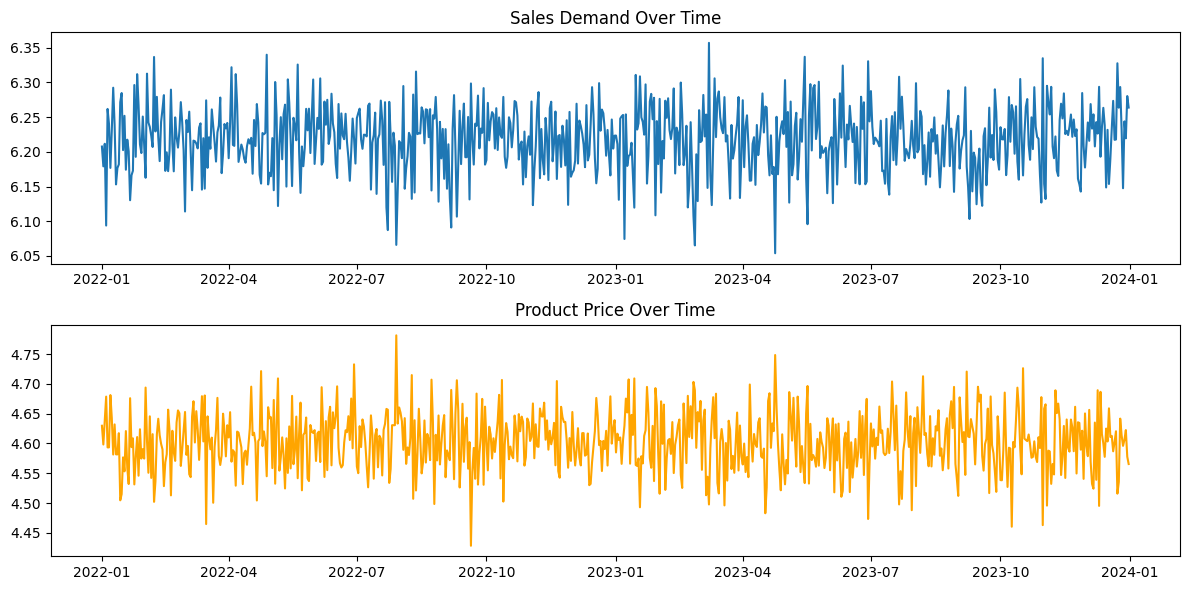

In [7]:
# Gráfico de series de tiempo para ventas y precios

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(df['date'], df['log_demand'], label = 'Demand')
plt.title('Sales Demand Over Time')

plt.subplot(2,1,2)
plt.plot(df['date'], df['log_price'], label='Price', color='orange')
plt.title('Product Price Over Time')
plt.tight_layout()
plt.show()

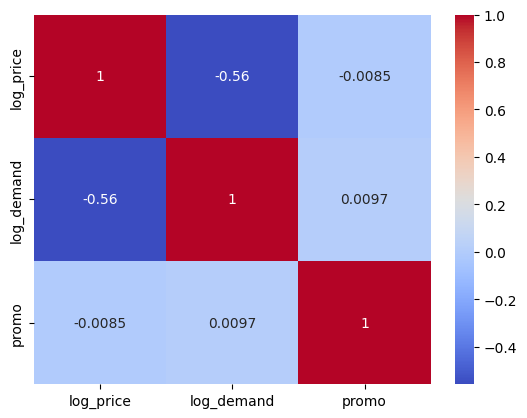

In [8]:
# Ver la correlación entre las variables

sns.heatmap(df[['log_price', 'log_demand', 'promo']].corr(), annot=True, cmap='coolwarm')
plt.show()

## **Estimación del modelo de elasticidad precio**

Vamos a utilizar un modelo de regresión lineal para estimar la elasticidad. En este caso, la elasticidad precio de la demanda puede ser estimada a partir de la pendiente de la relación entre el logaritmo de la demanda y el logaritmo del precio.

In [9]:
# Definimos la variable dependiente (log_demand) y las independientes (log_price y promo)

X = df[['log_price', 'promo']]
X = sm.add_constant(X)

y = df['log_demand']



In [10]:
# Ajustamos el modelo
model = sm.OLS(y, X).fit()

In [11]:
# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_demand   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     164.3
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           1.38e-59
Time:                        13:53:05   Log-Likelihood:                 1324.4
No. Observations:                 730   AIC:                            -2643.
Df Residuals:                     727   BIC:                            -2629.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6973      0.137     63.563      0.0

In [12]:
# Sin variable de promo
# Definimos la variable dependiente (log_demand) y las independientes (log_price y promo)

X = df['log_price']
X = sm.add_constant(X)

y = df['log_demand']

# Ajustamos el modelo
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_demand   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     328.9
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           6.13e-61
Time:                        13:54:04   Log-Likelihood:                 1324.3
No. Observations:                 730   AIC:                            -2645.
Df Residuals:                     728   BIC:                            -2636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6976      0.137     63.614      0.0

### **Interpretación de la salida:**

1. **Coeficientes:**
    *  Constante (const): 8.6976. Este es el intercepto del modelo. Aunque es importante para el ajuste del modelo, no tiene un valor interpretativo directo en el contexto de la elasticidad.
    * Coeficiente de log_price: -0.5386. Este es el coeficiente clave, ya que representa la elasticidad precio de la demanda. Este valor indica que un aumento del 1% en el precio del producto reduce la demanda en un 0.5386%. Es decir, la elasticidad precio de la demanda es de -0.5386.

2. **Interpretación de la elasticidad precio de la demanda:**
* Elasticidad precio de la demanda: El coeficiente de log_price es negativo, lo cual es consistente con la ley de la demanda: cuando el precio aumenta, la demanda disminuye.
    * Dado que el valor absoluto de la elasticidad es menor que 1 (|elasticidad| < 1), podemos decir que la demanda es inelástica al precio. Esto significa que los consumidores son relativamente poco sensibles a los cambios en el precio. Un aumento en el precio provocará una disminución en la demanda, pero no será proporcionalmente tan grande.
    * Elasticidad inelástica: Este producto tiene una elasticidad inelástica, lo que indica que un aumento de precios no reduce significativamente la demanda, lo que podría implicar que este producto es una necesidad o tiene pocos sustitutos.

3. **R-cuadrado (R-Squared):**
* Este valor nos indica que el modelo explica el 31.1% de la variabilidad en la demanda. Es decir, el 31.1% de la variación en la demanda del producto puede explicarse por los cambios en el precio (logaritmo del precio) y las otras variables incluidas en el modelo (en este caso, no hay más, pero podrías incluir promociones, estacionalidad, etc.). Este R-cuadrado es moderado, lo que sugiere que otras variables pueden influir en la demanda, aparte del precio.

4. **Significancia Estadística:**
* P-valor del coeficiente de log_price: 0.000. Esto significa que la relación entre el precio y la demanda es estadísticamente significativa. El valor p indica que hay menos de un 0.01% de probabilidad de que esta relación sea producto del azar.
* T-estadístico de log_price: -18.136. Un valor muy alto en términos absolutos, lo que refuerza la conclusión de que el precio tiene una influencia significativa sobre la demanda.

5. **F-statistic:**
* F-statistic: 328.9. Este valor mide si el modelo en su conjunto es significativo. Con un valor tan elevado y un p-valor asociado extremadamente bajo (6.13e-61), podemos concluir que el modelo es estadísticamente significativo.

6. **Verificación de Supuestos:**
* Durbin-Watson: 2.012. Este estadístico mide la autocorrelación de los residuos. Un valor cercano a 2 indica que no hay autocorrelación significativa, lo cual es una buena señal de que los residuos son independientes.

* Omnibus Test y Jarque-Bera Test: Estos son pruebas de normalidad de los residuos. Los p-valores asociados (0.327 y 0.316, respectivamente) son suficientemente altos, lo que sugiere que no podemos rechazar la hipótesis de que los residuos son normalmente distribuidos. Esto es una señal positiva para los supuestos del modelo.


**Conclusión:**
* Elasticidad precio de la demanda: La elasticidad estimada es -0.5386, lo que indica que la demanda es inelástica al precio. Es decir, un cambio en el precio genera una menor variación proporcional en la demanda.
* Rendimiento del modelo: El modelo tiene un R-cuadrado moderado (31.1%) y todos los coeficientes son significativos, con supuestos de regresión bien cumplidos.
* Implicaciones de negocio: Dado que la demanda es inelástica, la empresa podría aumentar los precios sin preocuparse de que las ventas caigan drásticamente, lo cual es relevante para decisiones de precios estratégicas.

Este análisis sugiere que, aunque el precio influye significativamente en la demanda, existen otras variables (promociones, estacionalidad, etc.) que podrían mejorar el modelo si se incluyen en futuros análisis.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


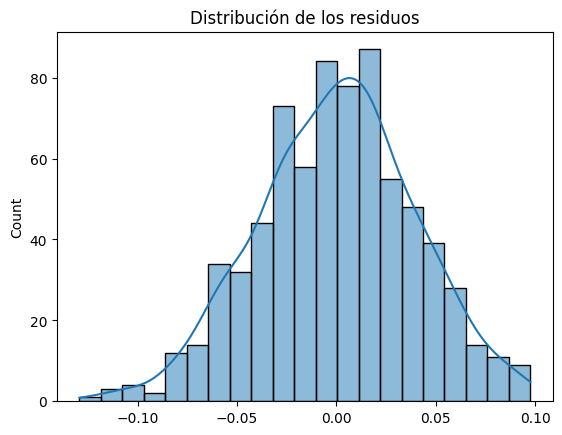

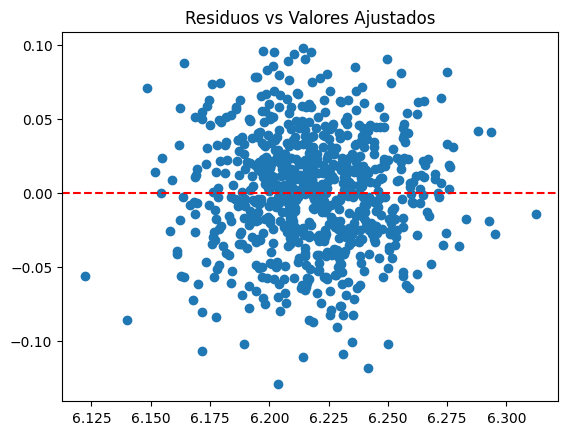

Estadístico de Durbin-Watson: 2.011549885973541


In [13]:
# Residuales
residuals = model.resid

# Verificamos la normalidad de los residuos
sns.histplot(residuals, kde=True)
plt.title("Distribución de los residuos")
plt.show()

# Gráfico de los residuos vs valores ajustados
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Valores Ajustados')
plt.show()

# Test de autocorrelación de los residuos (Durbin-Watson)
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f'Estadístico de Durbin-Watson: {dw_stat}')